In [2]:
import os
import numpy as np
import matplotlib.pyplot as mp
import scipy.signal as sig
import peakutils.peak as peak
import imageio
from jupyterthemes import jtplot

In [3]:
jtplot.reset()
mp.style.use("seaborn")
mp.rcParams["axes.axisbelow"] = True
mp.rcParams["text.usetex"] = True
mp.rcParams["font.family"] = "serif"
mp.rcParams["figure.figsize"] = (16/2, 9/2)
mp.rcParams["figure.dpi"] = 100
mp.rcParams["text.latex.preamble"] = [r"\usepackage{physics}"]

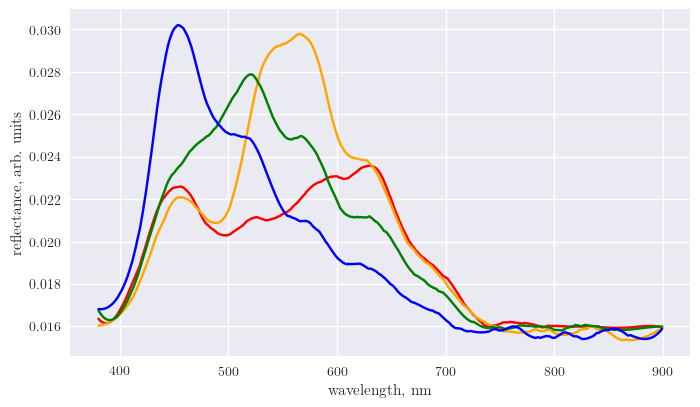

In [9]:
filenames = ['red_1.txt', 'yellow_4.txt', 'green_2.txt', 'blue_3.txt']
colors = ['r', 'orange', 'g', 'b']
for i,f in enumerate(filenames):
    data = np.genfromtxt(f, skip_header=4)
    wavelength, intensity = data.T
    int_profile = sig.savgol_filter(intensity, 71, 3)
    peaks = peak.indexes(np.array(int_profile), thres=0.2, min_dist=50)
#     mp.plot(wavelength, intensity, 'b.')
    mp.plot(wavelength, int_profile, color=colors[i])
    mp.xlabel('wavelength, nm')
    mp.ylabel('reflectance, arb. units')
mp.savefig('colorspec.png', dpi=300, bbox_inches='tight')
mp.show()